<a href="https://colab.research.google.com/github/mingyun642/sewon-This-code_8-29/blob/main/GAN_%EA%B5%AC%ED%98%84_8_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

n_learn: 0
loss_fake: 1.3519, acc_fake: 0.2188
loss_real: 1.9567, acc_real: 0.0000
loss_comb: 0.7629


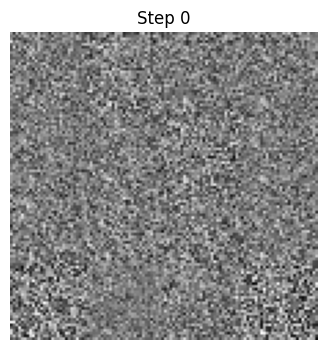

n_learn: 1000
loss_fake: 0.4090, acc_fake: 0.4400
loss_real: 0.4091, acc_real: 0.4398
loss_comb: 1.9333


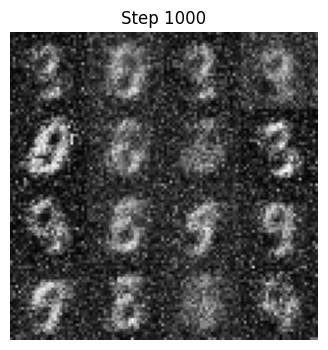

n_learn: 2000
loss_fake: 0.4154, acc_fake: 0.4452
loss_real: 0.4154, acc_real: 0.4451
loss_comb: 2.0448


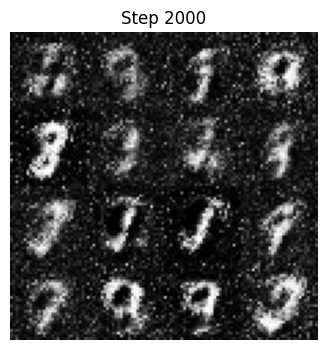

n_learn: 3000
loss_fake: 0.4248, acc_fake: 0.4440
loss_real: 0.4249, acc_real: 0.4439
loss_comb: 2.0710


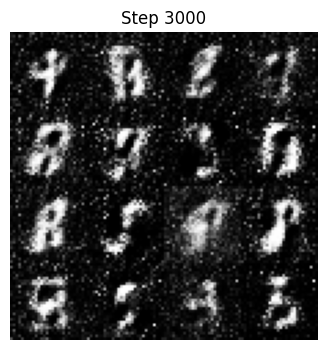

n_learn: 4000
loss_fake: 0.4313, acc_fake: 0.4426
loss_real: 0.4313, acc_real: 0.4425
loss_comb: 2.0684


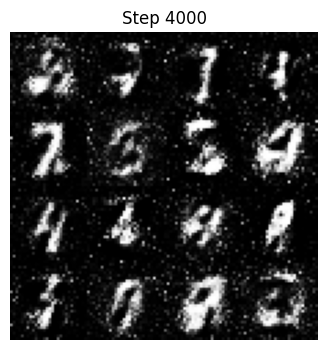

n_learn: 5000
loss_fake: 0.4343, acc_fake: 0.4419
loss_real: 0.4344, acc_real: 0.4419
loss_comb: 2.0689


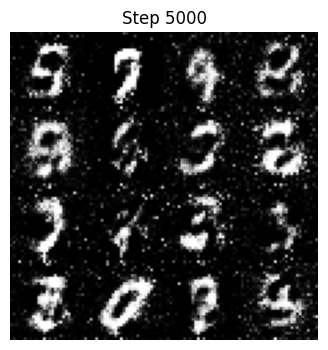

n_learn: 6000
loss_fake: 0.4365, acc_fake: 0.4418
loss_real: 0.4366, acc_real: 0.4417
loss_comb: 2.0738


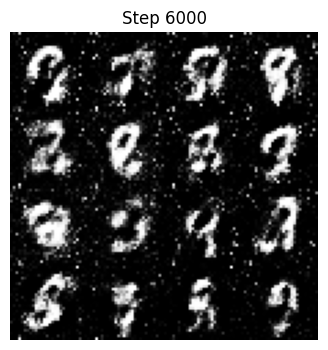

n_learn: 7000
loss_fake: 0.4402, acc_fake: 0.4411
loss_real: 0.4402, acc_real: 0.4411
loss_comb: 2.0655


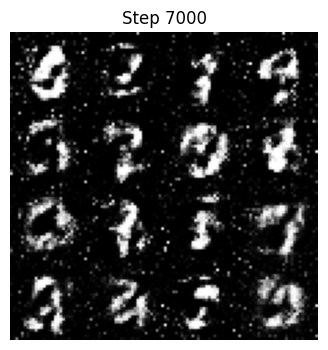

n_learn: 8000
loss_fake: 0.4427, acc_fake: 0.4407
loss_real: 0.4427, acc_real: 0.4406
loss_comb: 2.0626


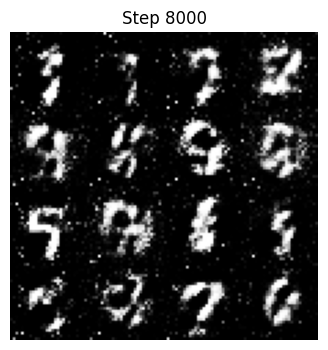

n_learn: 9000
loss_fake: 0.4454, acc_fake: 0.4400
loss_real: 0.4454, acc_real: 0.4400
loss_comb: 2.0540


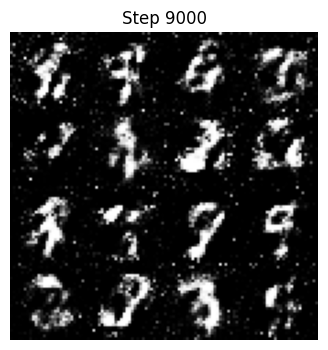

n_learn: 10000
loss_fake: 0.4463, acc_fake: 0.4397
loss_real: 0.4463, acc_real: 0.4397
loss_comb: 2.0527


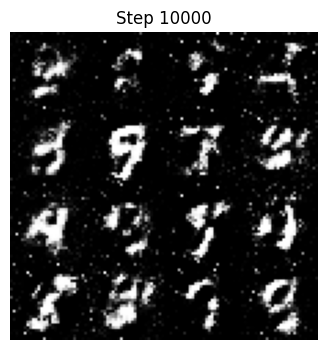

n_learn: 11000
loss_fake: 0.4468, acc_fake: 0.4394
loss_real: 0.4469, acc_real: 0.4393
loss_comb: 2.0556


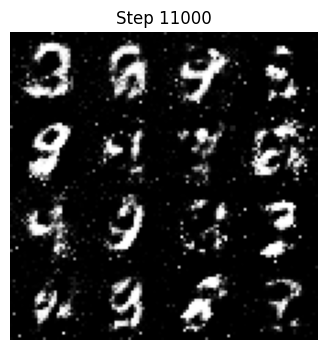

n_learn: 12000
loss_fake: 0.4477, acc_fake: 0.4391
loss_real: 0.4477, acc_real: 0.4391
loss_comb: 2.0537


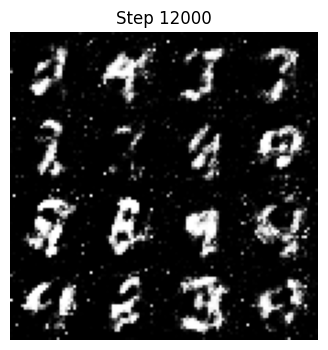

n_learn: 13000
loss_fake: 0.4482, acc_fake: 0.4389
loss_real: 0.4482, acc_real: 0.4389
loss_comb: 2.0533


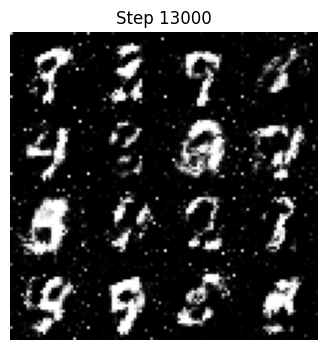

n_learn: 14000
loss_fake: 0.4491, acc_fake: 0.4388
loss_real: 0.4491, acc_real: 0.4388
loss_comb: 2.0508


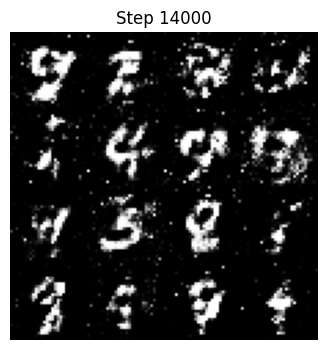

n_learn: 15000
loss_fake: 0.4498, acc_fake: 0.4384
loss_real: 0.4498, acc_real: 0.4384
loss_comb: 2.0482


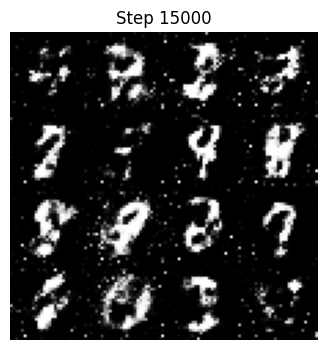

n_learn: 16000
loss_fake: 0.4497, acc_fake: 0.4383
loss_real: 0.4497, acc_real: 0.4383
loss_comb: 2.0480


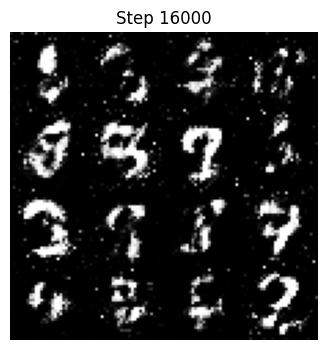

n_learn: 17000
loss_fake: 0.4498, acc_fake: 0.4383
loss_real: 0.4498, acc_real: 0.4382
loss_comb: 2.0475


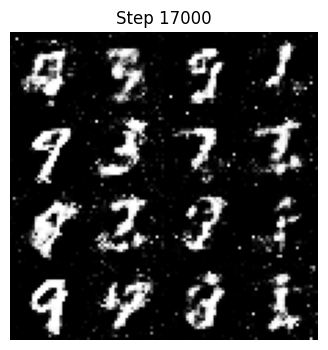

n_learn: 18000
loss_fake: 0.4503, acc_fake: 0.4379
loss_real: 0.4503, acc_real: 0.4379
loss_comb: 2.0438


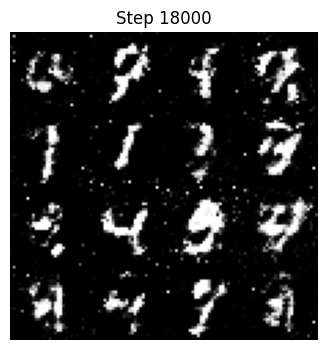

n_learn: 19000
loss_fake: 0.4515, acc_fake: 0.4376
loss_real: 0.4515, acc_real: 0.4376
loss_comb: 2.0380


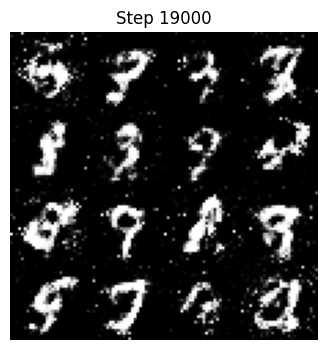

n_learn: 20000
loss_fake: 0.4526, acc_fake: 0.4372
loss_real: 0.4526, acc_real: 0.4372
loss_comb: 2.0316


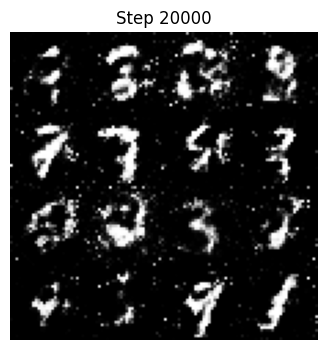

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, Input
from tensorflow.keras.optimizers import Adam
import os

# 경고 메시지 억제
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# 하이퍼파라미터
n_learn = 20001
interval = 1000
batch_size = 32
n_noize = 128
img_size = 28
alpha = 0.2

# 학습률 설정
optimizer_d = Adam(0.0002, 0.5)
optimizer_g = Adam(0.0001, 0.5)

# 데이터 로드
(x_train, t_train), (_, _) = mnist.load_data()
x_train = x_train / 255.0 * 2 - 1  # [-1, 1] 범위로 정규화
x_train = x_train.reshape(x_train.shape[0], -1)

# Generator
generator = Sequential([
    Dense(128, input_shape=(n_noize,)),
    LeakyReLU(alpha=alpha),
    Dense(256),
    LeakyReLU(alpha=alpha),
    Dense(img_size**2, activation="tanh")
])

# Discriminator
discriminator = Sequential([
    Dense(512, input_shape=(img_size**2,)),
    LeakyReLU(alpha=alpha),
    Dropout(0.3),
    Dense(256),
    LeakyReLU(alpha=alpha),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])
discriminator.compile(loss="binary_crossentropy", optimizer=optimizer_d, metrics=["accuracy"])

# GAN 구성
discriminator.trainable = False
noise = Input(shape=(n_noize,))
gen_img = generator(noise)
validity = discriminator(gen_img)
combined = Model(noise, validity)
combined.compile(loss="binary_crossentropy", optimizer=optimizer_g)

# 이미지 생성 함수
def generate_images(i):
    n_samples = 16
    n_noise=128
    noise = np.random.normal(0, 1, (n_samples, n_noise))  # n_noise는 노이즈 벡터 차원
    g_imgs = generator.predict(noise, verbose=0)

    # 이미지 시각화
    matrix_image = np.zeros((img_size * 4, img_size * 4))
    for r in range(4):
        for c in range(4):
            g_img = g_imgs[r * 4 + c].reshape(img_size, img_size)
            matrix_image[r*img_size:(r+1)*img_size, c*img_size:(c+1)*img_size] = g_img

    plt.figure(figsize=(4, 4))
    plt.imshow(matrix_image, cmap='gray')
    plt.axis('off')
    plt.title(f"Step {i}")
    plt.show()
# 학습 루프
batch_half = batch_size // 2
loss_record = np.zeros((n_learn, 3))
acc_record = np.zeros((n_learn, 2))

for i in range(n_learn):
    # -------------------------
    #  Train Discriminator
    # -------------------------
    g_noise = np.random.normal(0, 1, (batch_half, n_noize))
    g_imgs = generator(g_noise, training=False).numpy()

    real_idxs = np.random.randint(0, x_train.shape[0], batch_half)
    real_imgs = x_train[real_idxs]

    # Label smoothing (real: 0.9), label flipping (fake: 0.1 with p=0.05)
    real_labels = np.ones((batch_half, 1)) * 0.9
    flip_prob = 0.05
    fake_labels = np.random.choice([0.0, 0.1], size=(batch_half, 1), p=[1 - flip_prob, flip_prob])

    discriminator.trainable = True
    loss_real, acc_real = discriminator.train_on_batch(real_imgs, real_labels)
    loss_fake, acc_fake = discriminator.train_on_batch(g_imgs, fake_labels)

    # -------------------------
    #  Train Generator
    # -------------------------
    c_noise = np.random.normal(0, 1, (batch_size, n_noize))
    discriminator.trainable = False
    loss_comb = combined.train_on_batch(c_noise, np.ones((batch_size, 1)))

    # 기록 저장
    loss_record[i] = [loss_fake, loss_real, loss_comb if not isinstance(loss_comb, list) else loss_comb[0]]
    acc_record[i] = [acc_fake, acc_real]

    # 출력
    if i % interval == 0:
        print(f"n_learn: {i}")
        print(f"loss_fake: {loss_fake:.4f}, acc_fake: {acc_fake:.4f}")
        print(f"loss_real: {loss_real:.4f}, acc_real: {acc_real:.4f}")
        print(f"loss_comb: {loss_comb:.4f}")
        generate_images(i)

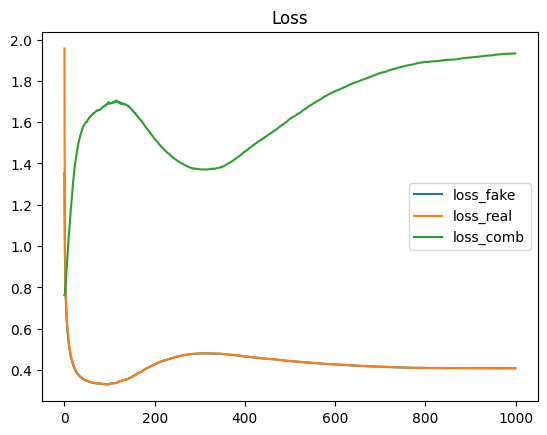

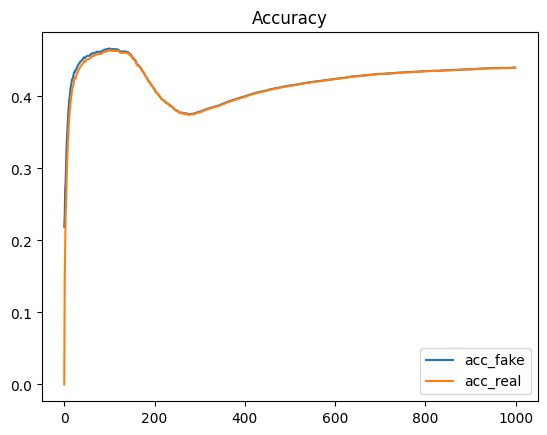

In [ ]:
# 오차의 추이
n_plt_loss = 1000  # 오차의 표시 범위
plt.plot(np.arange(n_plt_loss), loss_record[:n_plt_loss, 0], label="loss_fake")
plt.plot(np.arange(n_plt_loss), loss_record[:n_plt_loss, 1], label="loss_real")
plt.plot(np.arange(n_plt_loss), loss_record[:n_plt_loss, 2], label="loss_comb")
plt.legend()
plt.title("Loss")
plt.show()

# 정밀도의 추이
n_plt_acc = 1000  # 정밀도의 표시 범위
plt.plot(np.arange(n_plt_acc), acc_record[:n_plt_acc, 0], label="acc_fake")
plt.plot(np.arange(n_plt_acc), acc_record[:n_plt_acc, 1], label="acc_real")
plt.legend()
plt.title("Accuracy")
plt.show()